In [33]:
import pandas as pd
data=pd.read_csv("/content/Vocab.csv")
print(data)

       rownames  year     sex  education  vocabulary
0      19740001  1974    Male         14           9
1      19740002  1974    Male         16           9
2      19740003  1974  Female         10           9
3      19740004  1974  Female         10           5
4      19740005  1974  Female         12           8
...         ...   ...     ...        ...         ...
30346  20162861  2016  Female         13           6
30347  20162863  2016  Female         20           8
30348  20162864  2016    Male         15           7
30349  20162865  2016  Female         14           9
30350  20162866  2016  Female         14           5

[30351 rows x 5 columns]


In [34]:
data.isna().sum()

rownames      0
year          0
sex           0
education     0
vocabulary    0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["sex"]=b.fit_transform(data["sex"])
print(data)

       rownames  year  sex  education  vocabulary
0      19740001  1974    1         14           9
1      19740002  1974    1         16           9
2      19740003  1974    0         10           9
3      19740004  1974    0         10           5
4      19740005  1974    0         12           8
...         ...   ...  ...        ...         ...
30346  20162861  2016    0         13           6
30347  20162863  2016    0         20           8
30348  20162864  2016    1         15           7
30349  20162865  2016    0         14           9
30350  20162866  2016    0         14           5

[30351 rows x 5 columns]


In [36]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain,ytrain)

       rownames  year  sex  education
15311  19942313  1994    1          9
13449  19930956  1993    0          5
16047  19960528  1996    1         16
29478  20161529  2016    0         12
17574  19962897  1996    1         16
...         ...   ...  ...        ...
5670   19821385  1982    1         12
25866  20120494  2012    0         16
22388  20062467  2006    1         12
22981  20064391  2006    0          6
25721  20120270  2012    1         16

[29743 rows x 4 columns] 15311    3
13449    1
16047    9
29478    7
17574    8
        ..
5670     5
25866    9
22388    4
22981    2
25721    5
Name: vocabulary, Length: 29743, dtype: int64


In [38]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtrain)

In [39]:
c=br.predict([[20162867,2020,0,15]])
print(c)

[6]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


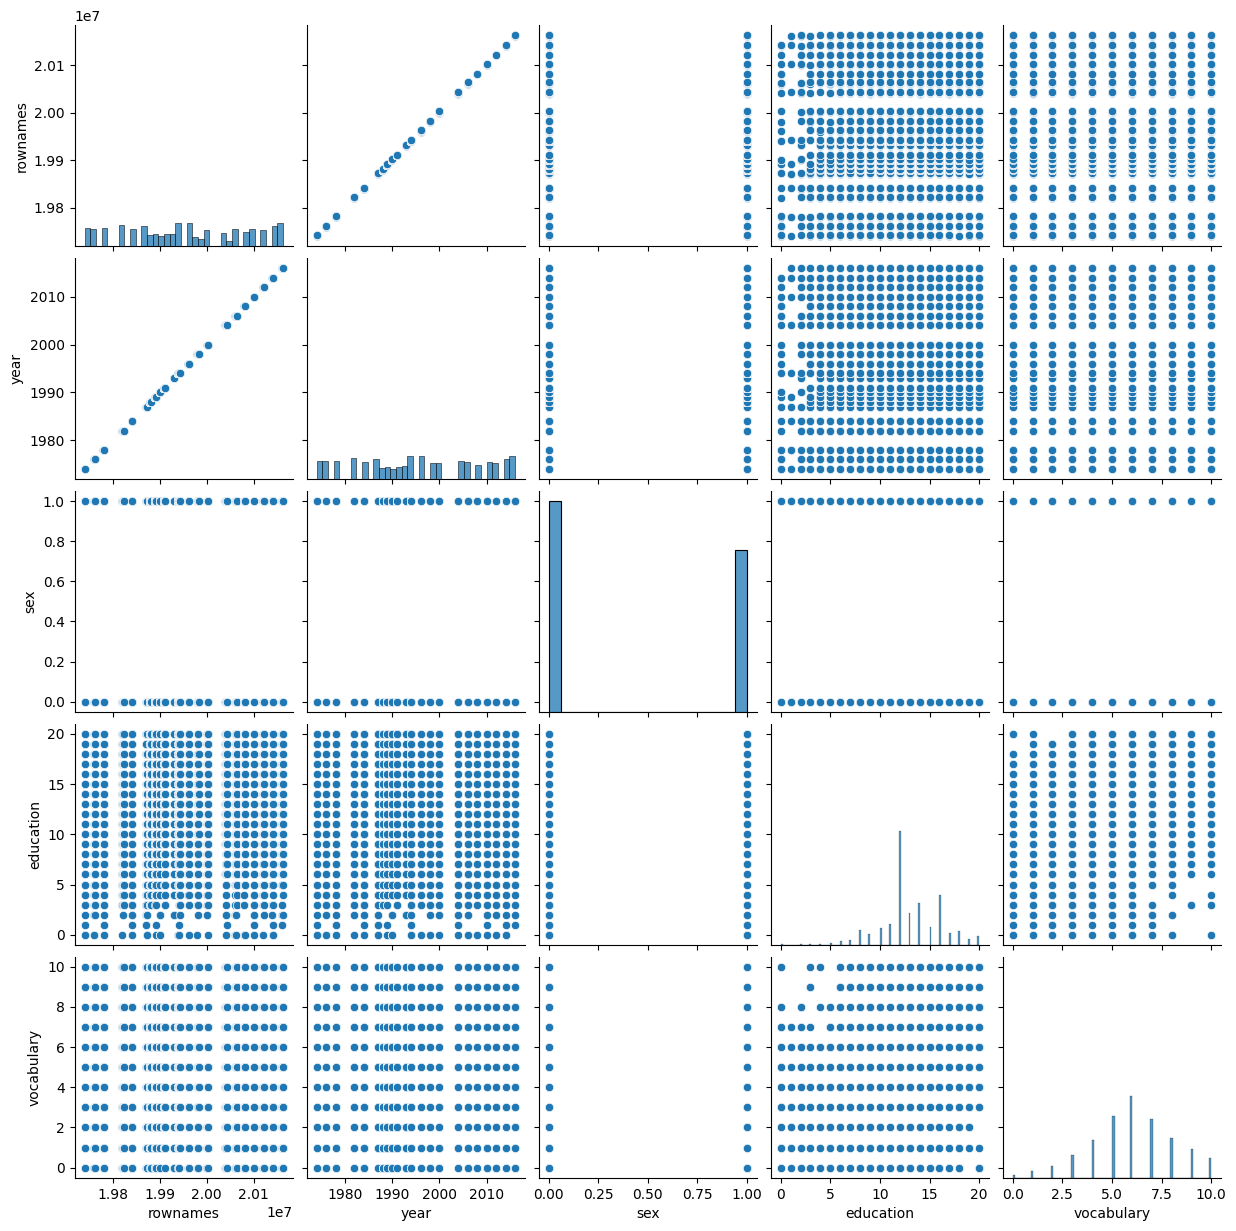

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
ypred = br.predict(xtest)
print(confusion_matrix(ytest, ypred))

[[  0   0   0   0   0   0   6   0   0   0   0]
 [  0   0   0   0   0   0  16   0   0   0   0]
 [  0   0   0   0   0   0  26   0   0   0   0]
 [  0   0   0   0   0   0  31   0   0   0   0]
 [  0   0   0   0   0   0  68   0   0   0   0]
 [  0   0   0   0   0   0  89   0   0   0   0]
 [  0   0   0   0   0   0 131   0   0   0   0]
 [  0   0   0   0   0   0  96   0   0   0   0]
 [  0   0   0   0   0   0  63   0   0   0   0]
 [  0   0   0   0   0   0  48   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0]]


In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.21546052631578946


In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        68
           5       0.00      0.00      0.00        89
           6       0.22      1.00      0.35       131
           7       0.00      0.00      0.00        96
           8       0.00      0.00      0.00        63
           9       0.00      0.00      0.00        48
          10       0.00      0.00      0.00        34

    accuracy                           0.22       608
   macro avg       0.02      0.09      0.03       608
weighted avg       0.05      0.22      0.08       608



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
